<a href="https://colab.research.google.com/github/joaofcitrangulo/Projetos_DS/blob/main/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análise dos Dados do Airbnb - *Barcelona***

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

<br>
<p align="center"><img src="https://images.unsplash.com/photo-1587368062478-e804f5e2a55a?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1182&q=80" height="500px"></p>
<p align="center"> 
Camp Nou. Imagem:Alessio Patron (Unsplash) </p> <br>

<br>

Segundo o site [Melhores Viagens](https://www.melhoresdestinos.com.br/melhores-cidades-europa-2.html), para os leitores da revista Travel + Leisure, Barcelona ficou entre os 10 melhores destinos da Europa. Pela reportagem, Barcelona pode ser considerada uma cidade para turismo completo.

Pela [Civitatis](https://www.tudosobrebarcelona.com/top-10), alguns dos melhores lugares para se visitar são: [Sagrada Família](https://www.tudosobrebarcelona.com/sagrada-familia), [Museu Nacional de Arte da Catalunha](https://www.tudosobrebarcelona.com/museu-nacional-arte-catalunha),[Porto Olímpico de Barcelona](https://www.tudosobrebarcelona.com/porto-olimpico-barcelona), [Parque Güell](https://www.tudosobrebarcelona.com/parque-guell) e [Museu Picasso](https://www.tudosobrebarcelona.com/museu-picasso).

Em 2019, pouco mais de 500 mil brasileiros visitaram a Espanha, sendo que Barcelona recebeu [43% desses turistas](https://www.panrotas.com.br/destinos/pesquisas-e-estatisticas/2020/02/espanha-bate-recorde-de-chegadas-internacionais-em-2019_171022.html).

Abaixo, faremos a análise desta cidade, com mais de  1,6 milhões de habitantes, com tantas histórias, com um dos melhores times de futebol do mundo e que ainda era lar de um dos melhores jogados de todos os tempos.

E deixo aqui uma pergunta. *Será que ex clube de Messi impacta no preço dos aluguéis em sua redondeza?*

Vamos para a análise.

## Obtenção dos Dados

Faremos a importação das bibliotecas necessárias e a importação do arquivo para tratamento e análise.


In [1]:
# instalando algumas ferramentas necessárias
!pip install pywaffle -q

In [2]:
!pip install wordcloud -q

In [3]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from pywaffle import Waffle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [4]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2021-07-07/visualisations/listings.csv')

## Análise Exploratória dos Dados

A partir de agora, trabalharemos os dados. Será que existe algum valor discrepante? Será que alguma variável não se encontra no formato correto? Essas e outras perguntas serão respondidas a seguir.


Abaixo temos nosso dicionário, onde conseguiremos entender cada variável do dataset:

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número do id do proprietário (anfitrião) da propriedade
* host_name - nome do anfitrião
* neighbourhood_group - grupo de bairros - terminologia utilizada em alguns países
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para alugar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo proprietário
* availability_365 - números de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,169,1,21,2019-10-11,0.23,18,60
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,240,3,52,2019-12-15,0.78,2,169
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.62,3,8
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2012-12-30,0.06,2,35
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,283,4,150,2020-03-11,1.54,2,148


### **1. Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificando o volume de dados do DataFrame
print('O arquivo possui {} entradas.' .format(df.shape[0]))
print('O arquivo possui {} variáveis. \n' .format(df.shape[1]))

# verificando os tipos de dados das variáveis
df.info()

O arquivo possui 17079 entradas.
O arquivo possui 16 variáveis. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17079 entries, 0 to 17078
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17079 non-null  int64  
 1   name                            17069 non-null  object 
 2   host_id                         17079 non-null  int64  
 3   host_name                       17030 non-null  object 
 4   neighbourhood_group             17079 non-null  object 
 5   neighbourhood                   17079 non-null  object 
 6   latitude                        17079 non-null  float64
 7   longitude                       17079 non-null  float64
 8   room_type                       17079 non-null  object 
 9   price                           17079 non-null  int64  
 10  minimum_nights                  17079 non-null  int64  
 11  number_of_reviews          

As variáveis estão em formatos aceitáveis para os tratamentos, conforme podemos observar na coluna "Dtype".

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum().sort_values(ascending=False) / df.shape[0]) * 100

reviews_per_month                 29.831957
last_review                       29.831957
host_name                          0.286902
name                               0.058551
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

É possível perceber que as variáveis *reviews_per_month* e *last_review* estão com 30% dos valores ausentes. Como essas colunas podem ser consideradas apenas informativas, não serão excluídas do dataset, assim como as colunas *host_name* e *name*.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Abaixo segue a distribuiçao das variáveis numéricas.

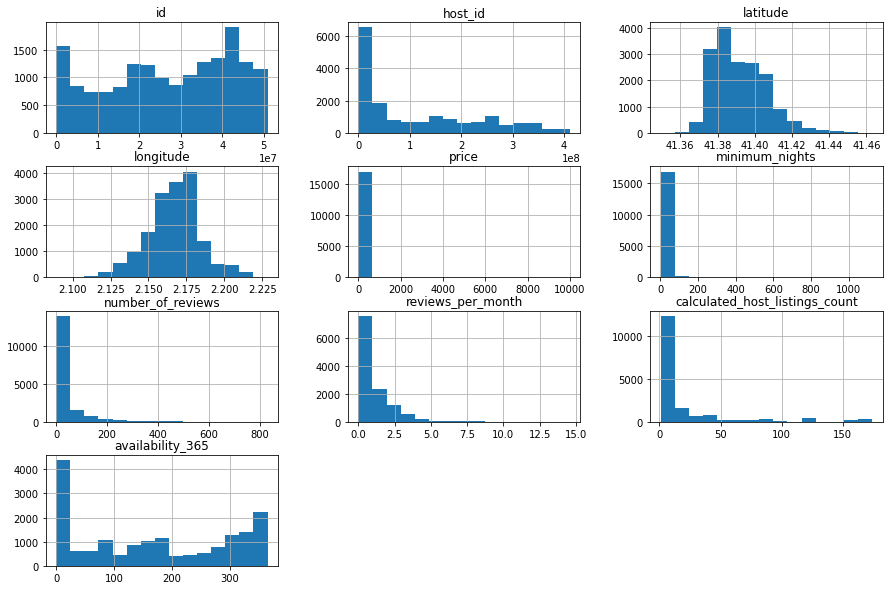

In [8]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15, figsize= (15, 10));

In [9]:
df[['price', 'availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].describe()

,price,availability_365,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,17079.000000,17079.000000,17079.000000,17079.000000,11984.000000,17079.000000
mean,115.013994,167.022484,12.217577,32.548100,1.012710,17.973476
std,312.660261,133.622862,29.996519,65.201064,1.200465,35.705521
min,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000
25%,39.000000,20.000000,1.000000,0.000000,0.150000,1.000000
50%,69.000000,158.000000,3.000000,4.000000,0.570000,3.000000
75%,132.000000,307.000000,30.000000,33.000000,1.500000,15.000000
max,9999.000000,365.000000,1124.000000,831.000000,14.570000,174.000000


A partir da tabela acima, é possível confirmar que temos *outliers*, pois observe que 75% dos preços do aluguel estão abaixo de € 132, no entanto, o valor máximo é € 9.999. Além disso, podemos observar que há imóveis com valor zerado. Note também que o mínimo de noites está muito acima do total de um ano (1124). Vamos plotar os boxplots dessas duas variáveis em questão (*price* e *minimum_nights*) para visualizar melhor os *outliers*.

**Boxplot da variável price**

IQR da variável price:  93.0
Limite superior de price:  271.5
Limite inferior de price:  -100.5

price: valores acima de 271.5.
949 entradas
5.5565%

price: valores zerados 4.
4 entradas
0.0234%


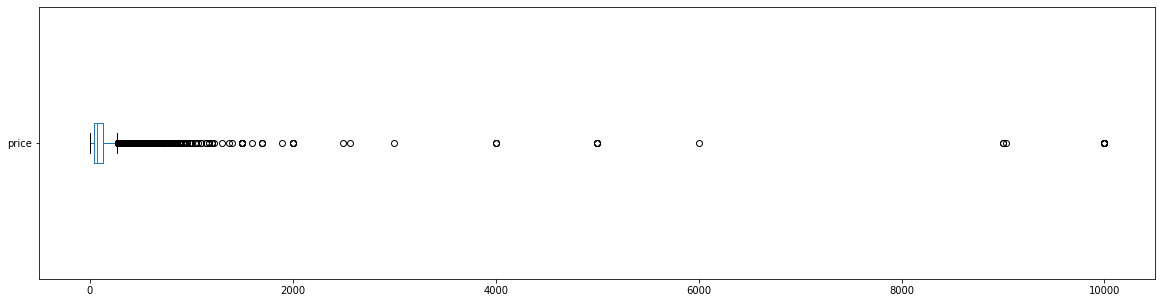

In [10]:
df.price.plot(kind='box', vert=False, figsize=(20, 5))

# definição do Q1 e Q3, para calcular o IQR da variável 'price', definindo o limite superi
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price
print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

# ver quantidade de valores acima do limite superior para 'price'
print(f"\nprice: valores acima de {sup_price}.")
print("{} entradas".format(len(df[df.price > sup_price])))
print("{:.4f}%".format((len(df[df.price > sup_price]) / df.shape[0])*100))

# ver quantidade de valores zerados para 'price'
price_zero = df.query('price == 0').shape[0]

print(f"\nprice: valores zerados {price_zero}.")
print("{} entradas".format(len(df[df.price == 0])))
print("{:.4f}%".format((len(df[df.price == 0]) / df.shape[0])*100))

A variável *price* apresenta 5,56% de valores acima do limite superior (*outliers*) e 0,02% de valores zerados. Para uma melhor análise, essas entradas serão excluídas mais a frente.

**Boxplot da variável minimum_nights**

IQR da variável minimum_nights:  29.0
Limite superior de minimum_nights:  73.5
Limite inferior de minimum_nights:  -42.5

Minimum_nights: valores acima de 73.5.
225 entradas
1.3174%


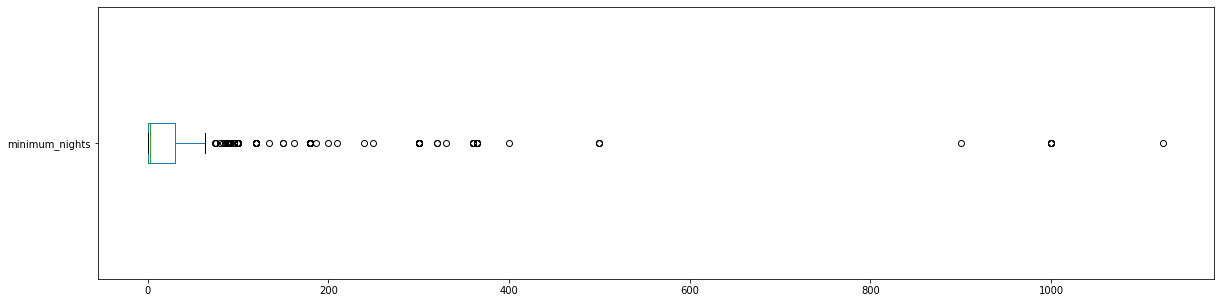

In [11]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 5))

# definição do Q1 e Q3, para calcular o IQR da variável 'minimum_nights', definindo o limite superior
q1_min_nights = df.minimum_nights.quantile(.25)
q3_min_nights = df.minimum_nights.quantile(.75)
IQR_min_nights = q3_min_nights - q1_min_nights
print('IQR da variável minimum_nights: ', IQR_min_nights)

# definindo os limites
sup_min_nights = q3_min_nights + 1.5 * IQR_min_nights
inf_min_nights = q1_min_nights - 1.5 * IQR_min_nights
print('Limite superior de minimum_nights: ', sup_min_nights)
print('Limite inferior de minimum_nights: ', inf_min_nights)

# ver quantidade de valores acima do limite superior para 'minimum_nights'
print(f"\nMinimum_nights: valores acima de {sup_min_nights}.")
print("{} entradas".format(len(df[df.minimum_nights > sup_min_nights])))
print("{:.4f}%".format((len(df[df.minimum_nights > sup_min_nights]) / df.shape[0])*100))

A variável *minimum_nights* possui 1,32% de *outliers*. Abaixo, faremos a exclusão dessas entradas para não distorcer nossas análises.

**Eliminando os outliers**

Conforme as análises feitas pelos *boxplots*, agora faremos a exclusão dos dados discrepantes.

In [12]:
#copiando os dados para novo dataframe
df_clean = df.copy()

#limpando os dados
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_min_nights].index, axis=0, inplace=True)

#verificando as variáveis estatísticas para o novo dataset
df_clean[['price', 'availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].describe()

,price,availability_365,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,15913.000000,15913.000000,15913.000000,15913.000000,11281.000000,15913.000000
mean,83.910702,163.895620,10.346383,33.184503,1.022888,17.462892
std,58.710043,133.472375,13.588145,66.396321,1.210692,35.085058
min,8.000000,0.000000,1.000000,0.000000,0.010000,1.000000
25%,38.000000,13.000000,1.000000,0.000000,0.150000,1.000000
50%,62.000000,155.000000,3.000000,4.000000,0.570000,3.000000
75%,121.000000,304.000000,30.000000,34.000000,1.520000,15.000000
max,271.000000,365.000000,64.000000,831.000000,14.570000,174.000000


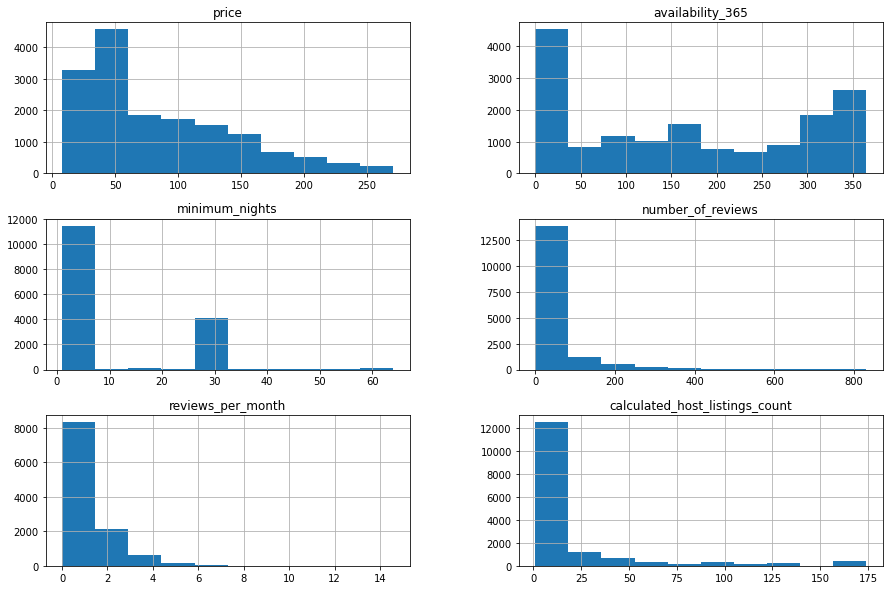

In [13]:
# plotar o histograma das variáveis numéricas após a remoção dos outliers
df_clean[['price', 'availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].hist(figsize= (15, 10));

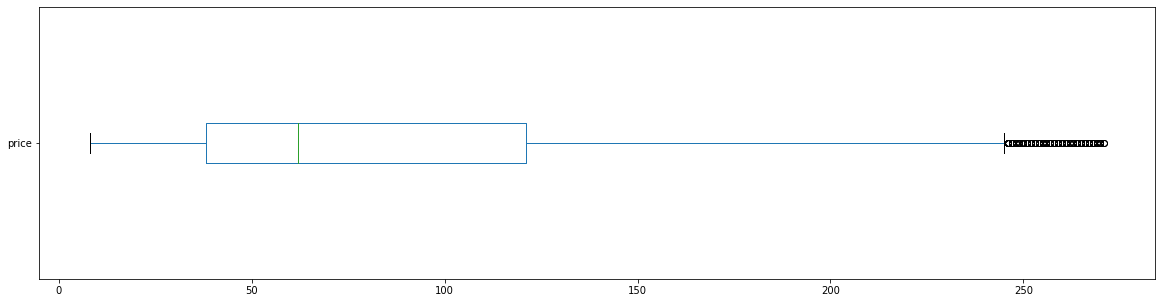

In [14]:
#plotando o boxplot da variável price após remoção dos outliers
df_clean.price.plot(kind='box', vert=False, figsize=(20, 5));

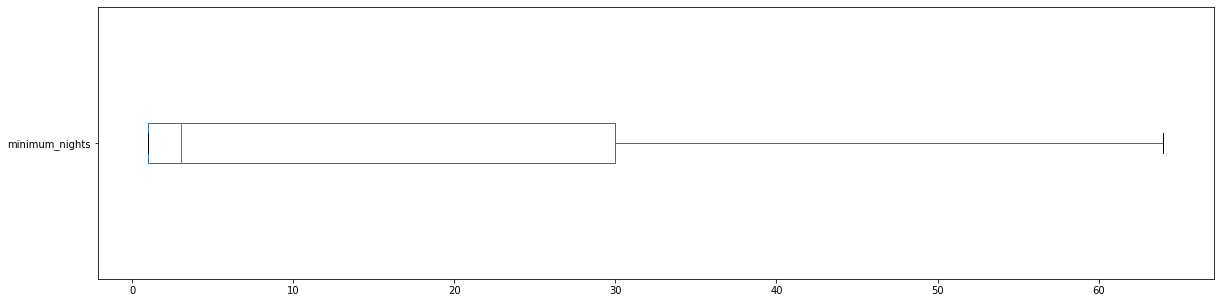

In [15]:
#plotando o boxplot da variável minimum_nights após alteração
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(20, 5));

In [16]:
media_price = st.mean(df_clean.price)
mediana_price = st.median(df_clean.price)
moda_price = st.mode(df_clean.price)

print(f'A média da variável price é {round(media_price)}')
print(f'A mediana da variável price é {mediana_price}')
print(f'A moda da variável price é {moda_price}')

A média da variável price é 84
A mediana da variável price é 62
A moda da variável price é 50


Como podemos observar acima, a moda da variável *price* é menor que sua mediana, sendo esta menor que sua média. Pelo histograma e com a confirmação dos valores, podemos concluir que a variável price apresenta uma **distribuição assimétrica, com sua cauda para a direita**.

Como podemos observar no *describe* do novo *dataset*, o ponto máximo da variável *price* (€ 271) se encontra abaixo do limite supertir inicial (€ 271.5), mostrando uma melhor distribuição dos dados. Podemos observar também essa melhor distribuição na variável *minimum_nights*.

### **Q4. Qual a média dos preços de aluguel?**

In [17]:
# ver a média da coluna `price``
df_clean.price.mean()

83.91070194180858

A média dos preços do aluguel é 83,91 euros.

### **Q4. Qual a correlação existente entre as variáveis?**

In [18]:
# criadno uma matriz de correlação
corr = df_clean[['price', 'availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].corr()
# mostrando a matriz de correlação
display(corr)

,price,availability_365,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
price,1.000000,0.174656,-0.208537,0.114728,0.123497,0.264672
availability_365,0.174656,1.000000,0.150279,0.037422,0.064293,0.197414
minimum_nights,-0.208537,0.150279,1.000000,-0.241458,-0.265248,0.144542
number_of_reviews,0.114728,0.037422,-0.241458,1.000000,0.725158,-0.120840
reviews_per_month,0.123497,0.064293,-0.265248,0.725158,1.000000,-0.067986
calculated_host_listings_count,0.264672,0.197414,0.144542,-0.120840,-0.067986,1.000000


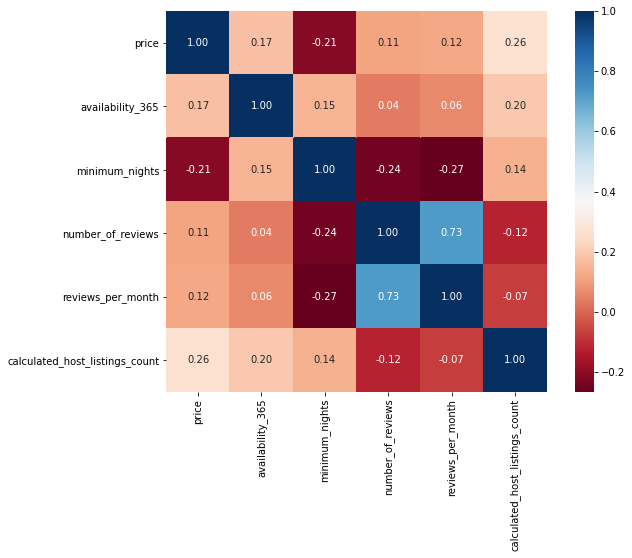

In [19]:
# plotando um heatmap a partir das correlações
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

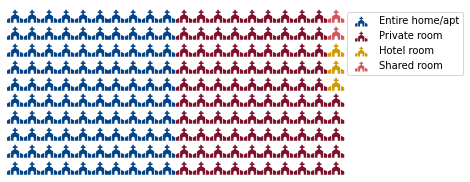

Entire home/apt    7957
Private room       7538
Hotel room          224
Shared room         194
Name: room_type, dtype: int64

In [20]:
# mostrando a quantidade de cada tipo de imóvel disponível
data = dict(df_clean['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    colors=("#044589", "#7F122A", "#D09A03", "#D15860"),  #cores da camisa do Barcelona
    values=data, icons='church', icon_size=13,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
df_clean.room_type.value_counts()

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    50.003142
Private room       47.370075
Hotel room          1.407654
Shared room         1.219129
Name: room_type, dtype: float64

É possível observar que há uma boa divisão entre alugar uma casa ou apartamento inteiro (50%) e um quarto privativo (47%). Como já mencionado no ínicio do estudo, por ter um "turismo completo", isso mostra que a cidade pode ser o destino tanto de casais, que optariam por casas ou apartamentos inteiros, quanto de jovens, que prefeririam um quarto privativo.

Abaixo temos um gráfico mostrando a dispersão dos imóveis pelo mapa de Barcelona.

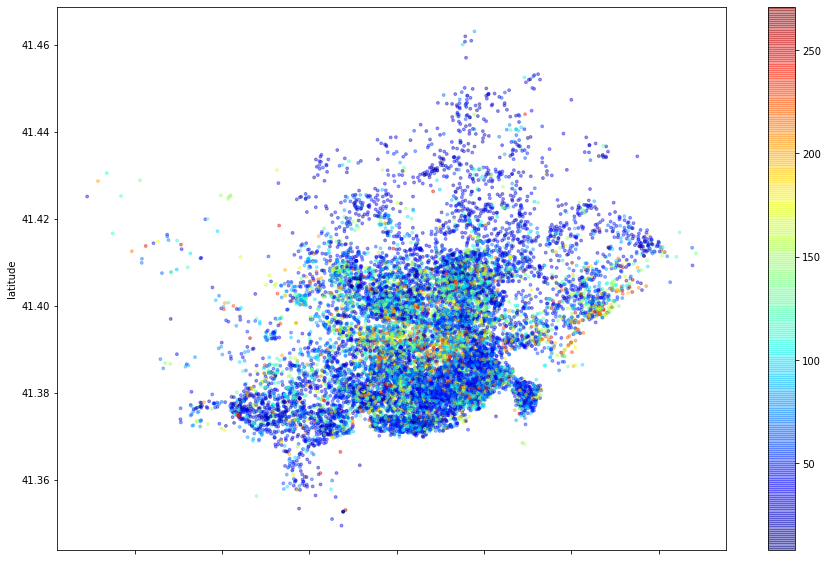

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

### **Q6. Agora vamos para a grande questão. Será que o estádio Camp Nou impacta tanto assim no preço dos imóveis ao seu redor?**



In [23]:
#preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:34]

neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    122.435185
la Vila Olímpica del Poblenou                   118.983871
Vallvidrera, el Tibidabo i les Planes           118.428571
la Dreta de l'Eixample                          112.734477
l'Antiga Esquerra de l'Eixample                 102.076655
el Poblenou                                     100.866295
la Sagrada Família                               96.301688
Sant Antoni                                      94.380353
Sant Gervasi - Galvany                           93.346505
el Putxet i el Farró                             93.115741
les Corts                                        88.162304
el Fort Pienc                                    88.029661
Sant Gervasi - la Bonanova                       87.019608
Sarrià                                           86.714286
la Vila de Gràcia                                85.494994
el Camp d'en Grassot i Gràcia Nova               84.006515
el Parc i la Llacuna del Poblenou         

Como podemos verificar acima, o bairro *Diagonal Mar i el Front Marítim del Poblenou* é o mais caro de Barcelona, custando em média 122.43 euros. 

O **Camp Nou** está localizado no bairro *la Maternitat i Sant Ramon* e é apenas o 33º bairro mais caro em média de preço. 

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# ver a média da coluna `minimum_nights``
df_diag = df_clean[df_clean['neighbourhood'] == 'Diagonal Mar i el Front Marítim del Poblenou']
print(df_clean['minimum_nights'].mean())
print(df_diag['minimum_nights'].mean())

10.346383460064098
5.805555555555555


Podemos observar que a média de dias para aluguel no bairro *Diagonal Mar i el Front Marítim del Poblenou* é quase metade dos dias exigidos para a cidade em geral.

Talvez, por ser o bairro mais caro, os proprietários sejam mais flexíveis em relação à quantidade mínima de dias.

### **Q8. Por que *Diagonal Mar i el Front Marítim del Poblenou* é o bairro mais caro da cidade?**

É lá que se encontra a basílica da **Sagrada Família**, o monumento mais visitado de Barcelona e pode ser considerado a obra mais importante de Antonio Gaudí.

Quer conhecer um pouco mais da basílica, fica aqui a dica para o site [Civitatis](https://www.tudosobrebarcelona.com/sagrada-familia).

<p align="center"><img src="https://images.unsplash.com/photo-1583779457094-ab6f77f7bf57?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=889&q=80" height="500px"></p>
<p align="center"> 
Sagrada Familia. Imagem:Miltiadis Fragkidis (Unsplash) </p> <br>

Confesso que quando pensei em analisar os dados de Barcelona, já preparava um texto para falar da importância do clube que leva o nome da cidade.

Porém, como já mencionado, o clube fica localizado no bairro **la Maternitat i Sant Ramon**, que é apenas o 33º bairro mais caro da cidade.

Aqui já podemos levantar um grande ponto do mundo atual. O *feeling* sempre será muito importante para qualquer negócio, pois precisamos levar em consideração a experiência do profissional, mas fazer a análise de seus dados evitará decisões erradas baseadas no *feeling* (ou no *achismo*), como pensei logo de cara em falar da importância do Barcelona para a cidade.

Fica um alerta para todos.

### **Aprofundando nos dados de Barcelona**

Vamos importar o dataset completo da cidade para vermos o que é mais ofertado pelos donos dos imóveis.

In [25]:
df_words = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2021-07-07/data/listings.csv.gz")

In [26]:
df_words.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20210707180233,2021-07-07,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,98%,81%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,34.0,34.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire apartment,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Washer"", ""Host greets you"", ""Iron"", ""Hair dr...",$169.00,1,1125,1.0,3.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,60,2021-07-07,21,0,0,2014-03-02,2019-10-11,4.40,4.55,4.75,4.80,4.90,4.75,4.30,HUTB-002062,t,18,18,0,0,0.23
1,23197,https://www.airbnb.com/rooms/23197,20210707180233,2021-07-08,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...",Strategically located in the Parc del Fòrum ar...,https://a0.muscache.com/pictures/738532/806da1...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi. I'm Etain, though everyone calls me by my...",within a few hours,100%,67%,f,https://a0.muscache.com/im/users/90417/profile...,https://a0.muscache.com/im/users/90417/profile...,El Besòs i el Maresme,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire apartment,Entire home/apt,6,NaN,2 baths,3.0,5.0,"[""Washer"", ""Iron"", ""Hair dryer"", ""Security cam...",$240.00,3,300,3.0,6.0,1125.0,1125.0,3.5,1125.0,NaN,t,17,47,77,169,2021-07-08,52,0,0,2016-01-05,2019-12-15,4.74,4.92,4.92,4.94,4.98,4.67,4.69,HUTB-005057,f,2,2,0,0,0.78
2,32711,https://www.airbnb.com/rooms/32711,20210707180233,2021-07-08,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,Nick,2010-05-31,"Barcelona, Catalonia, Spain",I'm Nick your English host in Barcelona.\r\n\r...,within a day,83%,100%,f,https://a0.muscache.com/im/users/135703/profil...,https://a0.muscache.com/im/users/135703/profil...,Camp d'en Grassot i Gràcia Nova,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40566,2.1

In [27]:
# eliminando os valores ausentes
neighborhood_overview	 = df_words.dropna(subset=['neighborhood_overview'], axis=0)['neighborhood_overview']

In [28]:
# exemplos de overviews para os bairros do Airbnb
display(neighborhood_overview	.iloc[100])
display(neighborhood_overview	.iloc[130])

'Poble Sec sits at the bottom of Montjuïc, to the south-east of Plaça Catalunya. This zone is highly residential and possesses a wide range of services, several pedestrian streets and a pleasant village atmosphere, and there is much entertainment to be had as well. This includes popular cafes, bars, restaurants, theaters and clubs, making it popular with visitors. A good choice if you want to be central but away from the crowds of tourists that populate more central areas!<br /><br />The main thoroughfare is Avinguda Paral·lel, an avenue that cuts down from picturesque Plaça Espanya right down to the World Trade Centre at the tip of the port.<br /><br />The event halls and the Palau de Congressos near Plaça Espanya make the Poble Sec area perfect for those in Barcelona on business, having a lot to offer tourists as well.<br /><br />Also very near Poble Sec is the Mercat de Sant Antoni which is a large market selling primarily food products, a good place to have a wander and overload yo

'Fantastic,central location in Eixample between Diagonal, Passeig de Gracia y Placa Catalunya. Plenty of trendy restaurants in the area, here is where local people meet. Only few blocks from Barcelona gay area - gayxample.'

In [29]:
# concatenando as palavras
all_description = " ".join(s for s in neighborhood_overview	)

print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 4373050


In [30]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

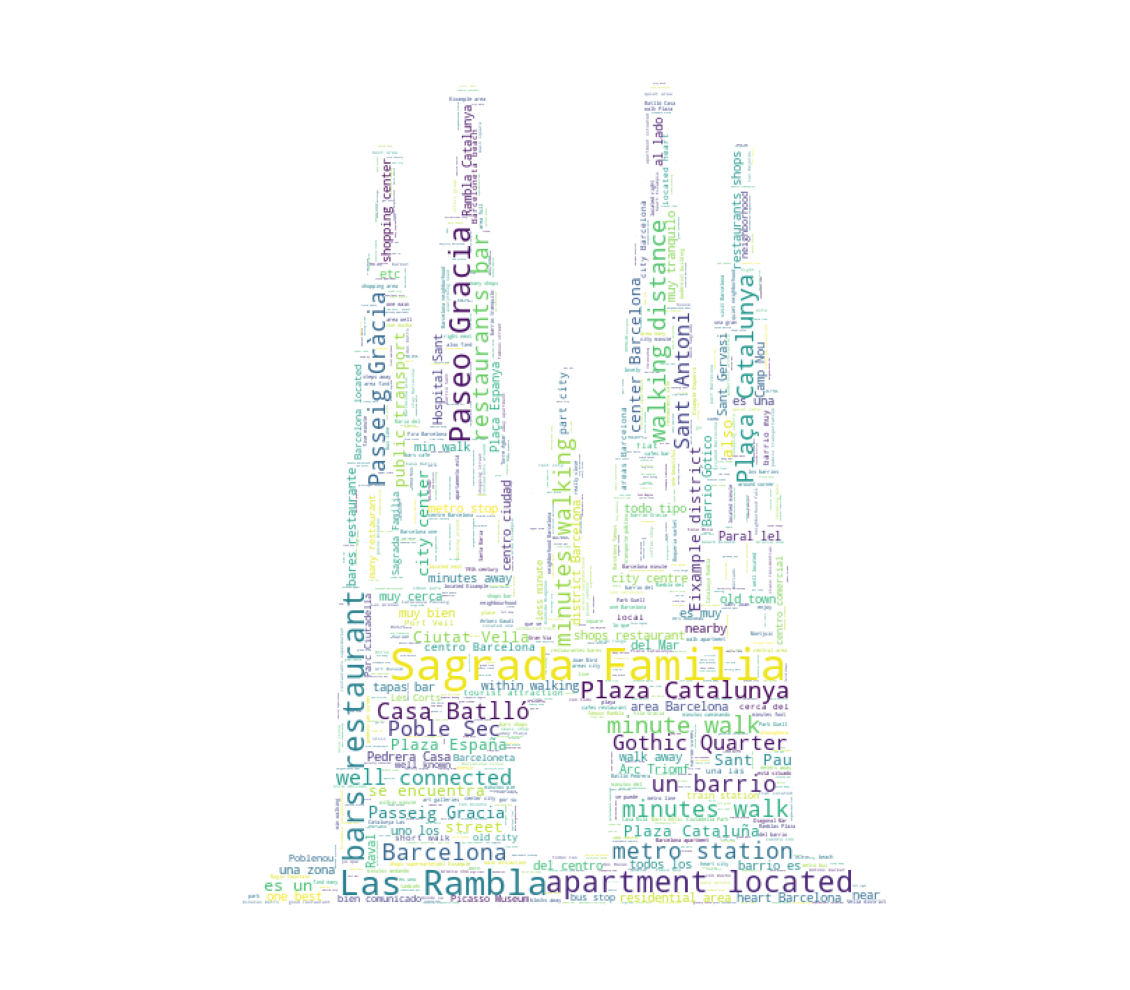

In [31]:
#lista de stopword
stop_words = set(stopwords.words('english'))
stop_words.update(["br", 'de', 'la', 'en', 'el']) #eliminando algumas palavras comuns encontradas nos textos.

# endereço da imagem
barca_mask = np.array(Image.open("/content/sagrada_familia2.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1000, height=1000, max_words=2500,
                      mask=barca_mask, max_font_size=200,
                      min_font_size=1).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

Palavras como "minute walk", "walking distance" e "apartment located" indicam a importância boa localização dos imóveis, ficando perto dos pontos turísticos.

 Há também outras palavras em destaque como: 
* **Sagrada Familia**, a basílica é obra mais importante de Antonio Gaudí e o monumento mais visitado de Barcelona.
* **Las Rambla**, 1,3 quilômeto de uma avenida que conecta vários pontos de Barcelona, repletos de bares, sempre com turistas animados e vários artistas de rua.
* **Casa Batlló**, uma peça chave da arquitetura modernista de Barcelona e pode ser considerada a obra-prima de Gaudí.
* **Passeig Gracia**, rua com várias lojas de estilistas famosos. Ainda é possível encontrar algumas criações de Gaudí, como a Casa Batlló.
* **Barrio Gótico**, com ruas medievais estreitas e labirínticas, possui várias atrações para curtir o centro da cidade.
* **Plaza Cataluña**, uma das maiores praças da Espanha e um dos lugares mais importantes de Barcelona.
* **bars e restaurant**, por suas ruas famosas e agitadas, não é de se estranhar que essas palavras são umas das mais procuradas em Barcelona.

## Conclusões


É muito usual procurarmos em sites de viagens sobre o destino que queremos visitar, mas o **Airbnb** nos oferece uma gama de informações úteis para que nosso próximo destino seja escolhido com mais riqueza de detalhes.

Mesmo sem a grande estrela do futebol mundial, Barcelona ainda se destaca como uma grande cidade turística, pelas suas atrações abrangentes para satisfazer o gosto de cada um.

Após essa breve análise, fica a dica para uma próxima (ou primeira) viagem internacional.